In [ ]:
# Séries temporais - Newton Teixeira do Nascimento Junior

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregamento da base de dados
base = pd.read_csv('dataset-tensao-barras-mes-jan-2021.csv', skiprows=0, sep = ';')
base.head(5)
#base.shape

,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
0,OTLM,BSBP4-01,2021-01-01 00:00:00,01/01/2021 00:00:00,2021-01-01,01/01/2021,00:00,0,68.0,69.0,...,DIA_UTIL,-1,-1,t,-1,-1,-1,-1,t,valor_referencia
1,OTLM,BSBP4-01,2021-01-01 00:01:00,01/01/2021 00:01:00,2021-01-01,01/01/2021,00:01,1,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
2,OTLM,BSBP4-01,2021-01-01 00:02:00,01/01/2021 00:02:00,2021-01-01,01/01/2021,00:02,2,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
3,OTLM,BSBP4-01,2021-01-01 00:03:00,01/01/2021 00:03:00,2021-01-01,01/01/2021,00:03,3,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
4,OTLM,BSBP4-01,2021-01-01 00:04:00,01/01/2021 00:04:00,2021-01-01,01/01/2021,00:04,4,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN


In [3]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

codregional               object
barra                     object
data_hora                 object
data_hora_v2              object
data                      object
data_v2                   object
horario                   object
nminuto                    int64
lim_inf                  float64
lim_recom                float64
lim_sup                  float64
valor_tensao             float64
status_carga_1            object
status_carga_2            object
id_tipo_dia                int64
tipo_dia                  object
id_tipo_carga              int64
tipo_carga                object
is_calcular_dtf           object
bit_ddf                    int64
bit_fdf                    int64
bit_fdf_acls               int64
bit_fdf_abli               int64
is_preprocessado          object
tipo_preprocessamento     object
dtype: object


In [4]:
base.describe(include="all")

,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
count,535680,535680,535680,535680,535680,535680,535680,535680.000000,535680.000000,535680.000000,...,535680,535680.000000,535680,535680,535680.000000,535680.000000,535680.000000,535680.000000,535680,56040
unique,1,12,44640,44640,31,31,1440,NaN,NaN,NaN,...,3,NaN,5,1,NaN,NaN,NaN,NaN,2,1
top,OTLM,PRBR4-01,2021-01-06 13:11:00,03/01/2021 23:11:00,2021-01-18,06/01/2021,11:54,NaN,NaN,NaN,...,DIA_UTIL,NaN,CARGA_MEDIA,t,NaN,NaN,NaN,NaN,f,valor_referencia
freq,535680,44640,12,12,17280,17280,372,NaN,NaN,NaN,...,362880,NaN,290275,535680,NaN,NaN,NaN,NaN,479640,56040
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,80.793526,82.146074,...,NaN,2.555081,NaN,NaN,0.745923,-0.059767,-0.091626,-0.117604,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.692482,26.216539,26.772780,...,NaN,1.395527,NaN,NaN,0.631468,0.381956,0.375589,0.368282,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,67.500000,68.500000,...,NaN,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.750000,68.500000,69.500000,...,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,69.000000,70.000000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.250000,70.000000,71.500000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
df_aux = base[['barra','data','lim_inf','lim_recom','lim_sup','valor_tensao'] ]

In [6]:
df_aux

,barra,data,lim_inf,lim_recom,lim_sup,valor_tensao
0,BSBP4-01,2021-01-01,68.0,69.0,70.0,69.00
1,BSBP4-01,2021-01-01,68.0,69.0,70.0,69.28
2,BSBP4-01,2021-01-01,68.0,69.0,70.0,69.36
3,BSBP4-01,2021-01-01,68.0,69.0,70.0,69.31
4,BSBP4-01,2021-01-01,68.0,69.0,70.0,69.31
...,...,...,...,...,...,...
535675,PFBP5-01,2021-01-31,140.0,141.9,143.0,142.90
535676,PFBP5-01,2021-01-31,140.0,141.9,143.0,142.90
535677,PFBP5-01,2021-01-31,140.0,141.9,143.0,143.10
535678,PFBP5-01,2021-01-31,140.0,141.9,143.0,143.10


In [7]:
df_aux.dtypes

barra            object
data             object
lim_inf         float64
lim_recom       float64
lim_sup         float64
valor_tensao    float64
dtype: object

In [8]:
df = base
df = df_aux.loc[(df_aux.barra == 'LIBP4-01') & ( df_aux.data >= '2021-01-01' ) &  (df_aux.data <= '2021-01-07')]
df = df[['lim_inf','lim_recom','lim_sup','valor_tensao'] ]

In [9]:
df = df[['lim_inf','lim_recom','lim_sup','valor_tensao'] ]

In [10]:
df

,lim_inf,lim_recom,lim_sup,valor_tensao
178560,69.0,70.0,71.0,70.00
178561,69.0,70.0,71.0,69.83
178562,69.0,70.0,71.0,69.81
178563,69.0,70.0,71.0,69.85
178564,69.0,70.0,71.0,69.82
...,...,...,...,...
188635,69.0,70.0,71.0,70.55
188636,69.0,70.0,71.0,70.58
188637,69.0,70.0,71.0,70.57
188638,69.0,70.0,71.0,70.54


<Figure size 432x288 with 0 Axes>

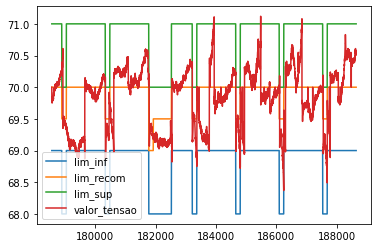

In [11]:
plt.figure(); df.plot(); plt.legend(loc = 'best')

In [12]:
df_aux['data'] = pd.to_datetime(df_aux['data'])

<ipython-input-12-39b20098c673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['data'] = pd.to_datetime(df_aux['data'])


In [18]:
base['data'] = pd.to_datetime(base['data'])
base['data_v2'] = pd.to_datetime(base['data_v2'])
base['data_hora'] = pd.to_datetime(base['data_hora'])
base['data_hora_v2'] = pd.to_datetime(base['data_hora_v2'])

In [19]:
base['codregional'] = base['codregional'].str

In [15]:
print(base.dtypes)

codregional                      object
barra                            object
data_hora                datetime64[ns]
data_hora_v2             datetime64[ns]
data                     datetime64[ns]
data_v2                  datetime64[ns]
horario                          object
nminuto                           int64
lim_inf                         float64
lim_recom                       float64
lim_sup                         float64
valor_tensao                    float64
status_carga_1                   object
status_carga_2                   object
id_tipo_dia                       int64
tipo_dia                         object
id_tipo_carga                     int64
tipo_carga                       object
is_calcular_dtf                  object
bit_ddf                           int64
bit_fdf                           int64
bit_fdf_acls                      int64
bit_fdf_abli                      int64
is_preprocessado                 object
tipo_preprocessamento            object


In [16]:
# Visualização do índice do dataframe (#Passengers) 
base.index

RangeIndex(start=0, stop=535680, step=1)

In [20]:
df_barras = base['barra'].unique()

In [21]:
df 

,lim_inf,lim_recom,lim_sup,valor_tensao
178560,69.0,70.0,71.0,70.00
178561,69.0,70.0,71.0,69.83
178562,69.0,70.0,71.0,69.81
178563,69.0,70.0,71.0,69.85
178564,69.0,70.0,71.0,69.82
...,...,...,...,...
188635,69.0,70.0,71.0,70.55
188636,69.0,70.0,71.0,70.58
188637,69.0,70.0,71.0,70.57
188638,69.0,70.0,71.0,70.54


In [22]:
# Criando um range de datas com frequência de segundos
rng = pd.date_range('1/1/2021', periods = 7*1440, freq = 'T')
ts = df['valor_tensao']
ts.index = rng

In [23]:
rng
for x in rng:
    print(x)

2021-01-01 00:00:00
2021-01-01 00:01:00
2021-01-01 00:02:00
2021-01-01 00:03:00
2021-01-01 00:04:00
2021-01-01 00:05:00
2021-01-01 00:06:00
2021-01-01 00:07:00
2021-01-01 00:08:00
2021-01-01 00:09:00
2021-01-01 00:10:00
2021-01-01 00:11:00
2021-01-01 00:12:00
2021-01-01 00:13:00
2021-01-01 00:14:00
2021-01-01 00:15:00
2021-01-01 00:16:00
2021-01-01 00:17:00
2021-01-01 00:18:00
2021-01-01 00:19:00
2021-01-01 00:20:00
2021-01-01 00:21:00
2021-01-01 00:22:00
2021-01-01 00:23:00
2021-01-01 00:24:00
2021-01-01 00:25:00
2021-01-01 00:26:00
2021-01-01 00:27:00
2021-01-01 00:28:00
2021-01-01 00:29:00
2021-01-01 00:30:00
2021-01-01 00:31:00
2021-01-01 00:32:00
2021-01-01 00:33:00
2021-01-01 00:34:00
2021-01-01 00:35:00
2021-01-01 00:36:00
2021-01-01 00:37:00
2021-01-01 00:38:00
2021-01-01 00:39:00
2021-01-01 00:40:00
2021-01-01 00:41:00
2021-01-01 00:42:00
2021-01-01 00:43:00
2021-01-01 00:44:00
2021-01-01 00:45:00
2021-01-01 00:46:00
2021-01-01 00:47:00
2021-01-01 00:48:00
2021-01-01 00:49:00


2021-01-03 07:20:00
2021-01-03 07:21:00
2021-01-03 07:22:00
2021-01-03 07:23:00
2021-01-03 07:24:00
2021-01-03 07:25:00
2021-01-03 07:26:00
2021-01-03 07:27:00
2021-01-03 07:28:00
2021-01-03 07:29:00
2021-01-03 07:30:00
2021-01-03 07:31:00
2021-01-03 07:32:00
2021-01-03 07:33:00
2021-01-03 07:34:00
2021-01-03 07:35:00
2021-01-03 07:36:00
2021-01-03 07:37:00
2021-01-03 07:38:00
2021-01-03 07:39:00
2021-01-03 07:40:00
2021-01-03 07:41:00
2021-01-03 07:42:00
2021-01-03 07:43:00
2021-01-03 07:44:00
2021-01-03 07:45:00
2021-01-03 07:46:00
2021-01-03 07:47:00
2021-01-03 07:48:00
2021-01-03 07:49:00
2021-01-03 07:50:00
2021-01-03 07:51:00
2021-01-03 07:52:00
2021-01-03 07:53:00
2021-01-03 07:54:00
2021-01-03 07:55:00
2021-01-03 07:56:00
2021-01-03 07:57:00
2021-01-03 07:58:00
2021-01-03 07:59:00
2021-01-03 08:00:00
2021-01-03 08:01:00
2021-01-03 08:02:00
2021-01-03 08:03:00
2021-01-03 08:04:00
2021-01-03 08:05:00
2021-01-03 08:06:00
2021-01-03 08:07:00
2021-01-03 08:08:00
2021-01-03 08:09:00


2021-01-05 17:40:00
2021-01-05 17:41:00
2021-01-05 17:42:00
2021-01-05 17:43:00
2021-01-05 17:44:00
2021-01-05 17:45:00
2021-01-05 17:46:00
2021-01-05 17:47:00
2021-01-05 17:48:00
2021-01-05 17:49:00
2021-01-05 17:50:00
2021-01-05 17:51:00
2021-01-05 17:52:00
2021-01-05 17:53:00
2021-01-05 17:54:00
2021-01-05 17:55:00
2021-01-05 17:56:00
2021-01-05 17:57:00
2021-01-05 17:58:00
2021-01-05 17:59:00
2021-01-05 18:00:00
2021-01-05 18:01:00
2021-01-05 18:02:00
2021-01-05 18:03:00
2021-01-05 18:04:00
2021-01-05 18:05:00
2021-01-05 18:06:00
2021-01-05 18:07:00
2021-01-05 18:08:00
2021-01-05 18:09:00
2021-01-05 18:10:00
2021-01-05 18:11:00
2021-01-05 18:12:00
2021-01-05 18:13:00
2021-01-05 18:14:00
2021-01-05 18:15:00
2021-01-05 18:16:00
2021-01-05 18:17:00
2021-01-05 18:18:00
2021-01-05 18:19:00
2021-01-05 18:20:00
2021-01-05 18:21:00
2021-01-05 18:22:00
2021-01-05 18:23:00
2021-01-05 18:24:00
2021-01-05 18:25:00
2021-01-05 18:26:00
2021-01-05 18:27:00
2021-01-05 18:28:00
2021-01-05 18:29:00


In [24]:
# Valores máximos 
ts.index.max()

Timestamp('2021-01-07 23:59:00', freq='T')

In [25]:
# mínimos
ts.index.min()

Timestamp('2021-01-01 00:00:00', freq='T')

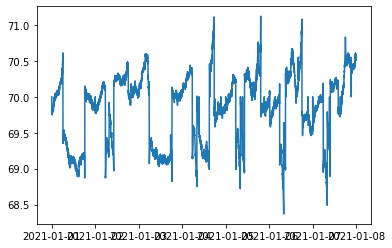

In [26]:
# Visualização da série temporal completa
plt.plot(ts)

2021-01-01 00:00:00    69.822500
2021-01-01 01:00:00    69.962667
2021-01-01 02:00:00    70.026833
2021-01-01 03:00:00    70.057500
2021-01-01 04:00:00    70.157000
                         ...    
2021-01-07 19:00:00    70.554667
2021-01-07 20:00:00    70.475667
2021-01-07 21:00:00    70.411167
2021-01-07 22:00:00    70.425333
2021-01-07 23:00:00    70.511667
Freq: H, Name: valor_tensao, Length: 168, dtype: float64

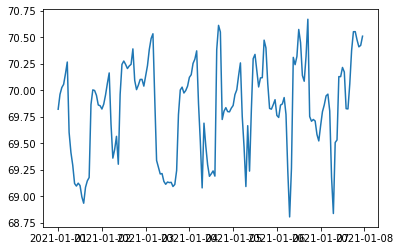

In [27]:
# Visualização por ano
ts_hora = ts.resample('H').mean()
plt.plot(ts_hora)
ts_hora